# Caso: Análisis de la empleabilidad de egresados

In [ ]:
#Instalación de libreria para leer archivos SAV:
!pip install pandas pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.9 MB/s eta 0:00:00


In [ ]:
# Imports usados:
import pandas as pd
import pyreadstat

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import math
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers

In [ ]:
#Formato:
# Mostrar floats con exactamente 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)

## Pre-procesamiento: Lectura de archivos

In [ ]:
#Lectura de archivos:
archivo1 = "04_EGRESADOS_CAP300.SAV"
archivo2 = "06_EGRESADOS_CAP400.SAV"

df_pred, meta300 = pyreadstat.read_sav(archivo1, encoding='latin1')
df_target, meta300 = pyreadstat.read_sav(archivo2, encoding='latin1')

In [ ]:
df_pred.head()

,SELECT,CAP300P301,CAP300P302,CAP300P303,CAP300P304,CAP300P305,CAP300P306,CAP300P307,CAP300P308,CAP300P309_1,...,CAP300P340_9,CAP300P340_9_ESPE,CAP300P347,CAP300P348,CAP300P349,CAP300P350,CAP300P351,CAP300P352,CAP300P353,F_EXPANS
0,1.00,2.00,2.00,2.00,NaN,2.00,2.00,NaN,2005.00,1.00,...,NaN,,2.00,2.00,1.00,2.00,1.00,2.00,1.00,14.35
1,2.00,2.00,2.00,2.00,NaN,2.00,2.00,NaN,2005.00,1.00,...,NaN,,2.00,2.00,1.00,2.00,1.00,12.00,5.00,19.14
2,3.00,1.00,1.00,2.00,NaN,1.00,2.00,NaN,2006.00,2.00,...,2.00,,2.00,1.00,1.00,1.00,3.00,18.00,1.00,11.25
3,5.00,2.00,2.00,2.00,NaN,2.00,2.00,NaN,2005.00,1.00,...,NaN,,2.00,2.00,1.00,1.00,2.00,12.00,4.00,16.13
4,6.00,1.00,1.00,2.00,NaN,1.00,2.00,NaN,2002.00,1.00,...,2.00,,1.00,2.00,1.00,1.00,7.00,21.00,3.00,25.90


In [ ]:
df_pred.describe().T

,count,mean,std,min,25%,50%,75%,max
SELECT,10564.00,5329.17,3072.73,1.00,2667.75,5330.50,7989.25,10649.00
CAP300P301,10564.00,1.44,0.57,1.00,1.00,1.00,2.00,3.00
CAP300P302,10564.00,1.36,0.48,1.00,1.00,1.00,2.00,2.00
CAP300P303,10564.00,1.98,0.15,1.00,2.00,2.00,2.00,2.00
CAP300P304,242.00,1.01,0.11,1.00,1.00,1.00,1.00,2.00
...,...,...,...,...,...,...,...,...
CAP300P350,9970.00,1.61,0.49,1.00,1.00,2.00,2.00,2.00
CAP300P351,9970.00,2.10,1.57,1.00,1.00,2.00,2.00,15.00
CAP300P352,9970.00,10.62,6.45,1.00,6.00,9.00,12.00,24.00
CAP300P353,9970.00,2.74,1.62,1.00,1.00,2.00,4.00,6.00


In [ ]:
df_target.head()

,SELECT,CAP400P401,CAP400P402,CAP400P403,CAP400P404_1,CAP400P404_2,CAP400P404_3,CAP400P404_4,CAP400P404_5,CAP400P404_6,...,campo_carr,Cod_Campo_educacion,COD_CAMP_EDUC,Campo_educacion,CAMP_EDUC,Cod_Campo_especifico,COD_CAMP_ESPEC,Campo_especifico,CAMP_ESPEC,F_EXPANS
0,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,5.00,5,5.00,"Ingeniería, Industria y Construcción","Ingeniería, Industria y Construcción",52,52.00,Ingeniería Industrial y Producción,Ingeniería Industrial y Producción,14.35
1,2.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.00,3,3.00,"Ciencias Sociales, Comerciales y Derecho","Ciencias Sociales, Comerciales y Derecho",33,33.00,Ciencias Administrativas y Comerciales,Ciencias Administrativas y Comerciales,19.14
2,3.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.00,3,3.00,"Ciencias Sociales, Comerciales y Derecho","Ciencias Sociales, Comerciales y Derecho",34,34.00,Ciencias Económicas y Contables,Ciencias Económicas y Contables,11.25
3,5.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.00,7,7.00,Ciencias de la Salud,Ciencias de la Salud,71,71.00,Ciencias de la Salud,Ciencias de la Salud,16.13
4,6.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1,1.00,Educación,Educación,11,11.00,Educación Inicial y Primaria,Educación Inicial y Primaria,25.90


In [ ]:
df_target.describe().T

,count,mean,std,min,25%,50%,75%,max
SELECT,10564.00,5329.17,3072.73,1.00,2667.75,5330.50,7989.25,10649.00
CAP400P401,10564.00,1.21,0.40,1.00,1.00,1.00,1.00,2.00
CAP400P402,2179.00,1.86,0.35,1.00,2.00,2.00,2.00,2.00
CAP400P403,1877.00,1.93,0.26,1.00,2.00,2.00,2.00,2.00
CAP400P404_1,1740.00,1.92,0.27,1.00,2.00,2.00,2.00,2.00
...,...,...,...,...,...,...,...,...
OCU_SEC2,9251.00,1.80,0.40,1.00,2.00,2.00,2.00,2.00
campo_carr,10564.00,4.02,1.70,1.00,3.00,3.00,5.00,9.00
COD_CAMP_EDUC,10564.00,4.01,1.68,1.00,3.00,3.00,5.00,7.00
COD_CAMP_ESPEC,10564.00,42.75,16.26,11.00,33.00,35.00,52.00,71.00


In [ ]:
df_target['CAP400P406']

,CAP400P406
0,NaN
1,1.00
2,1.00
3,1.00
4,1.00
...,...
10559,1.00
10560,2.00
10561,1.00
10562,2.00


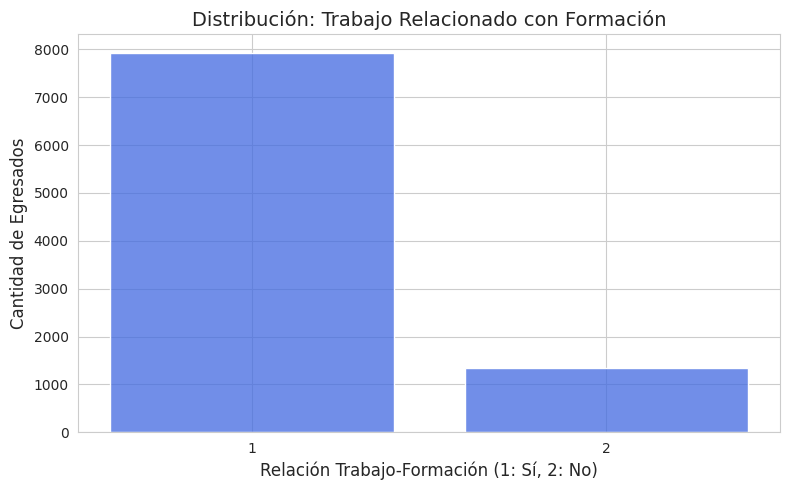

In [ ]:
# Configuración estética
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Histograma corregido
sns.histplot(df_target['CAP400P406'].dropna(), discrete=True, color='royalblue', shrink=0.8)

# Etiquetas y Títulos CORREGIDOS
plt.title('Distribución: Trabajo Relacionado con Formación', fontsize=14)
plt.xlabel('Relación Trabajo-Formación (1: Sí, 2: No)', fontsize=12)
plt.ylabel('Cantidad de Egresados', fontsize=12)

# xticks CORREGIDOS - solo 1 y 2 según tus datos
plt.xticks([1, 2])

plt.tight_layout()
plt.show()

In [ ]:
# Ver info general de la columna
print(f"Tipo de dato: {df_target['CAP400P406'].dtype}")
print(f"Valores nulos: {df_target['CAP400P406'].isnull().sum()}")
print(f"Valores únicos: {df_target['CAP400P406'].unique()}")
print("\nDistribución:")
print(df_target['CAP400P406'].value_counts().sort_index())

Tipo de dato: float64
Valores nulos: 1296
Valores únicos: [nan  1.  2.]

Distribución:
CAP400P406
1.00    7920
2.00    1348
Name: count, dtype: int64


In [ ]:
# Unir datasets:
df_merged = df_pred.merge(df_target, on='SELECT', how='inner')
print(f"Dataset unido: {df_merged.shape}")

Dataset unido: (10564, 350)


In [ ]:
# Ver tabla cruzada de los datos crudos antes de crear el target
print("--- CRUCE DE VARIABLES CRUDAS ---")
cruce = pd.crosstab(
    df_merged['CAP400P401'].fillna(-1),  # -1 si es nulo
    df_merged['CAP400P406'].fillna(-1)   # -1 si es nulo
)
print(cruce)

--- CRUCE DE VARIABLES CRUDAS ---
CAP400P406  -1.00  1.00   2.00 
CAP400P401                     
1.00            0   7354   1031
2.00         1296    566    317


In [ ]:
def clasificar_empleo_final(row):
    # 1. Variables
    trabaja = row['CAP400P401']
    afinidad = row['CAP400P406']

    # 2. JERARQUÍA: Si P401 dice que NO trabaja (2.0), es Target 0.
    # Esto limpia los 883 casos contradictorios (zombies) que vimos en el crosstab.
    if trabaja == 2.0:
        return 0

    # 3. Si dice que SÍ trabaja (1.0), miramos la calidad
    # Como solo se tiene 1.0 y 2.0 en los datos:

    if afinidad == 2.0:
        return 1  # CLASE 1: Trabajo "Regular" (Nivel medio)

    elif afinidad == 1.0:
        return 2  # CLASE 2: Trabajo "Relacionado" (Nivel alto)

    # Caso residual (si hay nulos en afinidad pero sí trabaja)
    # Asumimos clase 1 (Trabajo "Regular")
    else:
        return 1

In [ ]:
# --- TARGET ---
# NOTA: Ya no mapeamos CAP400P401 ni P406 aquí porque las fusionaremos antes.
# La variable nueva se llamará directamente 'TARGET_Multiclase'

#Aplicando nueva lógica de 3 clases basada en intensidad de afinidad:
df_merged['TARGET_Multiclase'] = df_merged.apply(clasificar_empleo_final, axis=1)

In [ ]:
# --- VERIFICACIÓN FINAL ---
conteo = df_merged['TARGET_Multiclase'].value_counts().sort_index()
print("\nNuevo Target Multiclase:")
print(conteo)


Nuevo Target Multiclase:
TARGET_Multiclase
0    2179
1    1031
2    7354
Name: count, dtype: int64


In [ ]:
df_merged.columns


Index(['SELECT', 'CAP300P301', 'CAP300P302', 'CAP300P303', 'CAP300P304',
       'CAP300P305', 'CAP300P306', 'CAP300P307', 'CAP300P308', 'CAP300P309_1',
       ...
       'Cod_Campo_educacion', 'COD_CAMP_EDUC', 'Campo_educacion', 'CAMP_EDUC',
       'Cod_Campo_especifico', 'COD_CAMP_ESPEC', 'Campo_especifico',
       'CAMP_ESPEC', 'F_EXPANS_y', 'TARGET_Multiclase'],
      dtype='object', length=351)

In [ ]:
# 1. Definimos el mapa de nombres (Diccionario)
# Solo incluimos las variables que queremos conservar y renombrar
mapa_nombres = {
    "SELECT":                     "ID_Egresado",

    # --- Perfil Académico ---
    "SELECT_UNI":                 "Universidad",
    "SELECT_UNI GESTION":         "Tipo_Gestion_Univ",
    "CAP300P312":                 "Carrera_Profesional",

    # --- Desempeño ---
    "CAP300P316":                 "Interrumpio_Estudios",
    "CAP300P322":                 "Intercambio_Internacional",
    "CAP300P323":                 "Idioma_Intercambio",
    "CAP300P324":                 "Pertenece_Cuadro_Merito",
    "CAP300P324A":                "Puesto_Merito",

    # --- Grados ---
    "CAP300P325":                 "Tiene_Bachiller",
    "CAP300P330":                 "Tiene_Titulo",
    "CAP300P331":                 "Modalidad_Titulacion",
    "CAP300P335":                 "Tiene_Postgrado",

    # --- PRÁCTICAS ---
    "CAP300P347":                 "Uso_Oficina_Laboral",
    "CAP300P348":                 "Uso_Bolsa_Trabajo",
    "CAP300P349":                 "Realizo_Practicas",
    "CAP300P350":                 "Practicas_Gestionadas_Univ",
    "CAP300P351":                 "Cantidad_Practicas",
    "CAP300P352":                 "Meses_Experiencia_Practicas",
    "CAP300P353":                 "Tamano_Empresa_Practicas"
}

In [ ]:
# 2. Renombramos las columnas en df_merged
df_merged.rename(columns=mapa_nombres, inplace=True)

# 3. Construimos la lista de columnas finales deseadas
# Son los valores del diccionario (nombres nuevos) + el Target creado
cols_deseadas = list(mapa_nombres.values())
if 'TARGET_Multiclase' in df_merged.columns:
    cols_deseadas.append('TARGET_Multiclase')

# 4. Filtramos (Creación de df_final)
# Usamos una intersección para evitar errores si alguna columna ya no existe
cols_existentes = [col for col in cols_deseadas if col in df_merged.columns]
df_final = df_merged[cols_existentes].copy()

# 5. Verificación
print(f"Dimensiones de df_final: {df_final.shape}")

Dimensiones de df_final: (10564, 20)


In [ ]:
df_final.head()

,ID_Egresado,Universidad,Carrera_Profesional,Interrumpio_Estudios,Intercambio_Internacional,Idioma_Intercambio,Pertenece_Cuadro_Merito,Puesto_Merito,Tiene_Bachiller,Tiene_Titulo,Modalidad_Titulacion,Tiene_Postgrado,Uso_Oficina_Laboral,Uso_Bolsa_Trabajo,Realizo_Practicas,Practicas_Gestionadas_Univ,Cantidad_Practicas,Meses_Experiencia_Practicas,Tamano_Empresa_Practicas,TARGET_Multiclase
0,1.00,U0026,INDUSTRIAS ALIMENTARIAS,2.00,4.00,NaN,1.00,2.00,1.00,2.00,NaN,1.00,2.00,2.00,1.00,2.00,1.00,2.00,1.00,0
1,2.00,U0063,ADMINISTRACIÓN DE EMPRESAS,2.00,4.00,NaN,2.00,NaN,1.00,1.00,1.00,1.00,2.00,2.00,1.00,2.00,1.00,12.00,5.00,2
2,3.00,U0013,CONTABILIDAD,2.00,4.00,NaN,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,1.00,1.00,3.00,18.00,1.00,2
3,5.00,U0060,ENFERMERÍA,2.00,4.00,NaN,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,12.00,4.00,2
4,6.00,U0021,EDUCACIÓN PRIMARIA,2.00,4.00,NaN,1.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,7.00,21.00,3.00,2


In [ ]:
df_final.dtypes

,0
ID_Egresado,float64
Universidad,object
Carrera_Profesional,object
Interrumpio_Estudios,float64
Intercambio_Internacional,float64
Idioma_Intercambio,float64
Pertenece_Cuadro_Merito,float64
Puesto_Merito,float64
Tiene_Bachiller,float64
Tiene_Titulo,float64


## Pre-procesamiento: Definición de variables

In [ ]:
#Valores nulos por columna
print("VALORES NULOS:")
nulos = df_final.isnull().sum()
nulos_pct = (nulos / len(df_final)) * 100
calidad_datos = pd.DataFrame({'Nulos': nulos, 'Porcentaje': nulos_pct})
print(calidad_datos.sort_values('Nulos', ascending=False))

VALORES NULOS:
                             Nulos  Porcentaje
Idioma_Intercambio           10312       97.61
Modalidad_Titulacion          6004       56.83
Puesto_Merito                 5236       49.56
Tiene_Titulo                  1723       16.31
Cantidad_Practicas             594        5.62
Meses_Experiencia_Practicas    594        5.62
Tamano_Empresa_Practicas       594        5.62
Practicas_Gestionadas_Univ     594        5.62
Interrumpio_Estudios             0        0.00
Carrera_Profesional              0        0.00
Universidad                      0        0.00
ID_Egresado                      0        0.00
Tiene_Postgrado                  0        0.00
Tiene_Bachiller                  0        0.00
Intercambio_Internacional        0        0.00
Pertenece_Cuadro_Merito          0        0.00
Realizo_Practicas                0        0.00
Uso_Bolsa_Trabajo                0        0.00
Uso_Oficina_Laboral              0        0.00
TARGET_Multiclase                0        0.0

In [ ]:
#Limpieza de variables:

# 1. ELIMINAR variables redundantes/problemáticas
variables_a_eliminar = [
    'Idioma_Intercambio',      # 97.61% nulos
    'Modalidad_Titulacion',    # 56.83% nulos
    'Puesto_Merito'           # 49.56% nulos (redundante con Pertenece_Cuadro_Merito)
]

df_final_clean = df_final.drop(variables_a_eliminar, axis=1)
print(f"Eliminadas: {variables_a_eliminar}")

Eliminadas: ['Idioma_Intercambio', 'Modalidad_Titulacion', 'Puesto_Merito']


In [ ]:
# 2. IMPUTACIÓN SIMPLE del resto
print("\n--- IMPUTACIÓN ---")

# Tiene_Titulo (16.31% nulos)
moda_titulo = df_final_clean['Tiene_Titulo'].mode()[0]
df_final_clean['Tiene_Titulo'] = df_final_clean['Tiene_Titulo'].fillna(moda_titulo)
print(f"Tiene_Titulo imputado con moda: {moda_titulo}")

# Variables de prácticas (5.62% nulos)
practicas_vars = ['Cantidad_Practicas', 'Meses_Experiencia_Practicas',
                  'Tamano_Empresa_Practicas', 'Practicas_Gestionadas_Univ']

for var in practicas_vars:
    if df_final_clean[var].dtype in ['float64', 'int64']:
        mediana = df_final_clean[var].median()
        df_final_clean[var] = df_final_clean[var].fillna(mediana)
        print(f"{var} imputado con mediana: {mediana}")
    else:
        moda = df_final_clean[var].mode()[0]
        df_final_clean[var] = df_final_clean[var].fillna(moda)
        print(f"{var} imputado con moda: {moda}")


--- IMPUTACIÓN ---
Tiene_Titulo imputado con moda: 1.0
Cantidad_Practicas imputado con mediana: 2.0
Meses_Experiencia_Practicas imputado con mediana: 9.0
Tamano_Empresa_Practicas imputado con mediana: 2.0
Practicas_Gestionadas_Univ imputado con mediana: 2.0


In [ ]:
# 3. VERIFICACIÓN
print("\n=== RESULTADO FINAL ===")
print(f"Dataset: {df_final_clean.shape[0]} filas, {df_final_clean.shape[1]} columnas")
print(f"Valores nulos totales: {df_final_clean.isnull().sum().sum()}")


=== RESULTADO FINAL ===
Dataset: 10564 filas, 17 columnas
Valores nulos totales: 0


In [ ]:
df_final_clean.head()

,ID_Egresado,Universidad,Carrera_Profesional,Interrumpio_Estudios,Intercambio_Internacional,Pertenece_Cuadro_Merito,Tiene_Bachiller,Tiene_Titulo,Tiene_Postgrado,Uso_Oficina_Laboral,Uso_Bolsa_Trabajo,Realizo_Practicas,Practicas_Gestionadas_Univ,Cantidad_Practicas,Meses_Experiencia_Practicas,Tamano_Empresa_Practicas,TARGET_Multiclase
0,1.00,U0026,INDUSTRIAS ALIMENTARIAS,2.00,4.00,1.00,1.00,2.00,1.00,2.00,2.00,1.00,2.00,1.00,2.00,1.00,0
1,2.00,U0063,ADMINISTRACIÓN DE EMPRESAS,2.00,4.00,2.00,1.00,1.00,1.00,2.00,2.00,1.00,2.00,1.00,12.00,5.00,2
2,3.00,U0013,CONTABILIDAD,2.00,4.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,18.00,1.00,2
3,5.00,U0060,ENFERMERÍA,2.00,4.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,12.00,4.00,2
4,6.00,U0021,EDUCACIÓN PRIMARIA,2.00,4.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,7.00,21.00,3.00,2


In [ ]:
#Valores únicos:
(df_final_clean.nunique()).sort_values(ascending=False)

,0
ID_Egresado,10564
Carrera_Profesional,343
Universidad,93
Meses_Experiencia_Practicas,24
Cantidad_Practicas,15
Tamano_Empresa_Practicas,6
Intercambio_Internacional,4
Uso_Oficina_Laboral,3
Uso_Bolsa_Trabajo,3
TARGET_Multiclase,3


In [ ]:
df_final_clean.dtypes

,0
ID_Egresado,float64
Universidad,object
Carrera_Profesional,object
Interrumpio_Estudios,float64
Intercambio_Internacional,float64
Pertenece_Cuadro_Merito,float64
Tiene_Bachiller,float64
Tiene_Titulo,float64
Tiene_Postgrado,float64
Uso_Oficina_Laboral,float64


## To check

In [ ]:
print("=== OPTIMIZACIÓN DE TIPOS - ESTRATEGIA CORREGIDA ===")

# 1. BINARIAS PURAS (2 valores) → int8
binarias_puras = [
    'Interrumpio_Estudios', 'Pertenece_Cuadro_Merito', 'Tiene_Bachiller',
    'Tiene_Titulo', 'Tiene_Postgrado', 'Realizo_Practicas',
    'Practicas_Gestionadas_Univ'
]

for col in binarias_puras:
    if col in df_final_clean.columns:
        df_final_clean[col] = df_final_clean[col].astype('int8')
        print(f"{col} → int8 (binaria)")

# 2. VARIABLES CON 3-4 VALORES → int8
variables_multiclase = [
    'Uso_Oficina_Laboral', 'Uso_Bolsa_Trabajo',
    'TARGET_Multiclase', 'Intercambio_Internacional'
]

for col in variables_multiclase:
    if col in df_final_clean.columns:
        df_final_clean[col] = df_final_clean[col].astype('int8')
        print(f"{col} → int8 ({df_final_clean[col].nunique()} categorías)")

# 3. VARIABLES ORDINALES → int8
variables_ordinales = ['Tamano_Empresa_Practicas']
for col in variables_ordinales:
    if col in df_final_clean.columns:
        df_final_clean[col] = df_final_clean[col].astype('int8')
        print(f"{col} → int8 (ordinal)")

# 4. VARIABLES CONTINUAS → float32 (SIN REDONDEAR)
variables_continuas = ['Cantidad_Practicas', 'Meses_Experiencia_Practicas']
for col in variables_continuas:
    if col in df_final_clean.columns:
        df_final_clean[col] = df_final_clean[col].astype('float32')
        print(f"{col} → float32 (continua)")

# 5. ID y TEXTUALES se mantienen
print(f"ID_Egresado → {df_final_clean['ID_Egresado'].dtype}")
print(f"Universidad → object (texto)")
print(f"Carrera_Profesional → object (texto)")

=== OPTIMIZACIÓN DE TIPOS - ESTRATEGIA CORREGIDA ===
Interrumpio_Estudios → int8 (binaria)
Pertenece_Cuadro_Merito → int8 (binaria)
Tiene_Bachiller → int8 (binaria)
Tiene_Titulo → int8 (binaria)
Tiene_Postgrado → int8 (binaria)
Realizo_Practicas → int8 (binaria)
Practicas_Gestionadas_Univ → int8 (binaria)
Uso_Oficina_Laboral → int8 (3 categorías)
Uso_Bolsa_Trabajo → int8 (3 categorías)
TARGET_Multiclase → int8 (3 categorías)
Intercambio_Internacional → int8 (4 categorías)
Tamano_Empresa_Practicas → int8 (ordinal)
Cantidad_Practicas → float32 (continua)
Meses_Experiencia_Practicas → float32 (continua)
ID_Egresado → float64
Universidad → object (texto)
Carrera_Profesional → object (texto)


In [ ]:
df_final_clean.dtypes

,0
ID_Egresado,float64
Universidad,object
Carrera_Profesional,object
Interrumpio_Estudios,int8
Intercambio_Internacional,int8
Pertenece_Cuadro_Merito,int8
Tiene_Bachiller,int8
Tiene_Titulo,int8
Tiene_Postgrado,int8
Uso_Oficina_Laboral,int8


## To check

In [ ]:
#Creación de un data frame para visualizar los datos:

# 1. CREAR COPIA
df_visual = df_final_clean.copy()

# 2. MAPEOS CORREGIDOS (usar 1, 2 en lugar de 1.0, 2.0)
mapa_sino = {1: 'Sí', 2: 'No'}
mapa_intercambio = {1: 'Sí, nacional', 2: 'Sí, regional', 3: 'Sí, internacional', 4: 'No'}
mapa_uso = {1: 'Sí', 2: 'No', 3: 'No existe'}
mapa_merito = {1: 'Tercio Superior', 2: 'Quinto Superior', 3: 'Décimo Superior'}
mapa_tamano_empresa = {1: 'Hasta 20', 2: '21-50', 3: '51-100', 4: '101-500', 5: 'Más 500', 6: 'No precisa'}
mapa_target = {0: 'Desempleado', 1: 'Empleo No Afín', 2: 'Empleo Afín'}

# 3. APLICAR MAPEOS A VARIABLES QUE SÍ EXISTEN
mapeos_corregidos = {
    # Binarias simples
    'Interrumpio_Estudios': mapa_sino,
    'Tiene_Bachiller': mapa_sino,
    'Tiene_Titulo': mapa_sino,
    'Tiene_Postgrado': mapa_sino,
    'Realizo_Practicas': mapa_sino,
    'Practicas_Gestionadas_Univ': mapa_sino,
    'Pertenece_Cuadro_Merito': mapa_sino,

    # Variables con más categorías
    'Intercambio_Internacional': mapa_intercambio,
    'Uso_Oficina_Laboral': mapa_uso,
    'Uso_Bolsa_Trabajo': mapa_uso,
    'Tamano_Empresa_Practicas': mapa_tamano_empresa,

    # Target
    'TARGET_Multiclase': mapa_target
}

for col, mapa in mapeos_corregidos.items():
    if col in df_visual.columns:
        df_visual[col] = df_visual[col].map(mapa)

# 4. DEFINIR LISTAS CORRECTAS PARA GRÁFICOS
categoricas_para_graficos = [
    'TARGET_Multiclase', 'Realizo_Practicas', 'Tiene_Titulo',
    'Tiene_Bachiller', 'Interrumpio_Estudios', 'Intercambio_Internacional',
    'Practicas_Gestionadas_Univ', 'Uso_Oficina_Laboral', 'Uso_Bolsa_Trabajo',
    'Pertenece_Cuadro_Merito', 'Tamano_Empresa_Practicas'
]

numericas_para_graficos = [
    'Cantidad_Practicas', 'Meses_Experiencia_Practicas'
]

# Filtrar solo las que existen
categoricas_para_graficos = [c for c in categoricas_para_graficos if c in df_visual.columns]
numericas_para_graficos = [c for c in numericas_para_graficos if c in df_visual.columns]

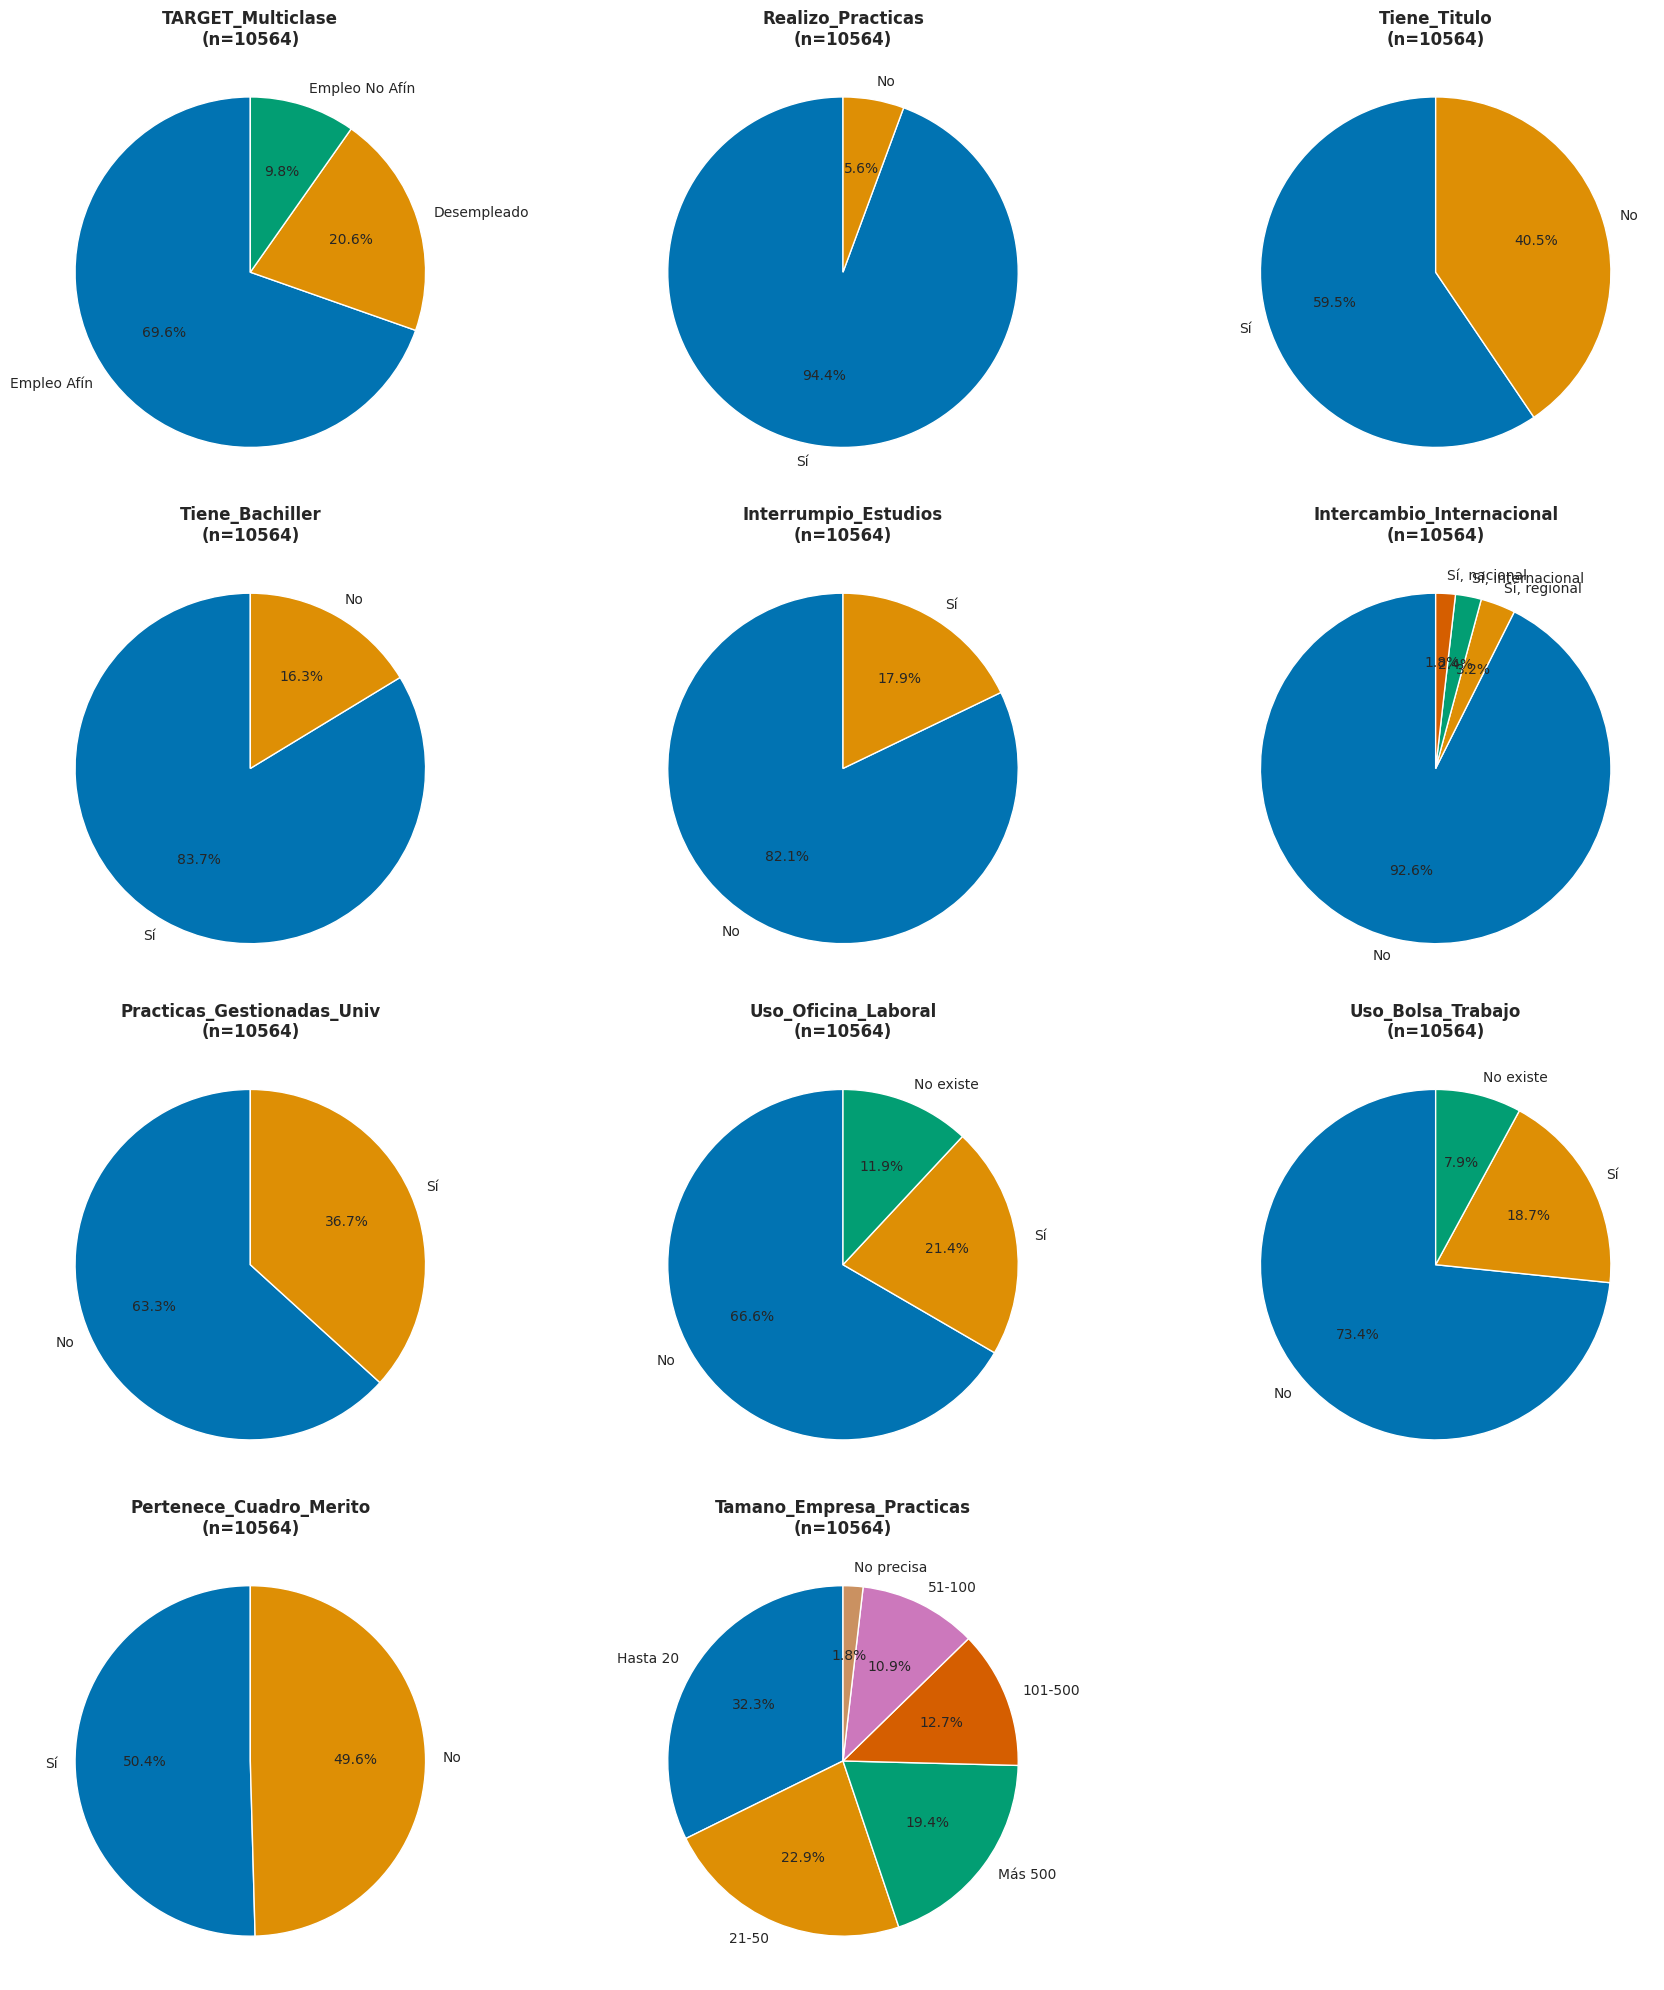

In [ ]:
# GRÁFICOS DE TORTA PARA CATEGÓRICAS
if len(categoricas_para_graficos) > 0:
    cols_per_row = 3
    n_cols = len(categoricas_para_graficos)
    n_rows = math.ceil(n_cols / cols_per_row)

    plt.figure(figsize=(18, n_rows * 5))  # Más espacio

    for idx, col in enumerate(categoricas_para_graficos, 1):
        plt.subplot(n_rows, cols_per_row, idx)

        counts = df_visual[col].value_counts()

        plt.pie(
            counts.values,
            labels=counts.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=sns.color_palette("colorblind", len(counts))
        )
        plt.title(f'{col}\n(n={len(df_visual[col].dropna())})', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

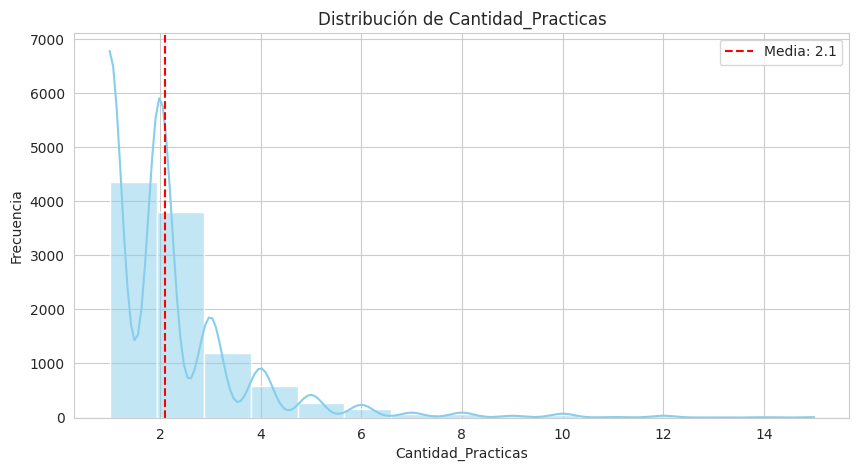

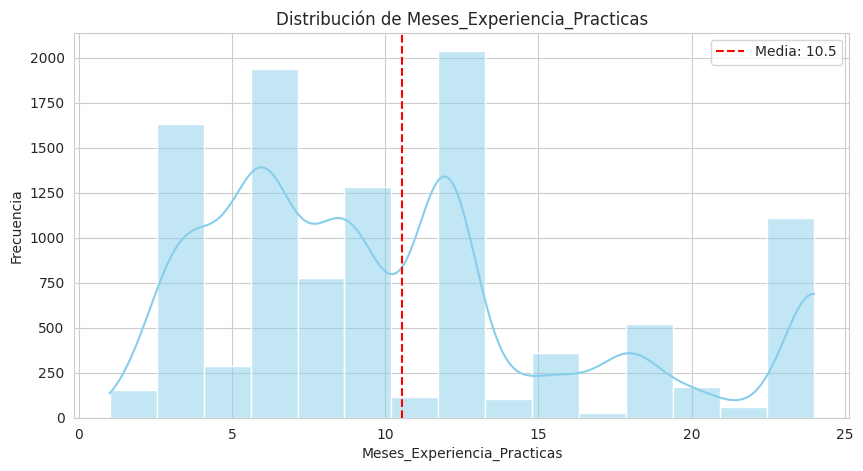

In [ ]:
# HISTOGRAMAS PARA NUMÉRICAS
if len(numericas_para_graficos) > 0:
    for col in numericas_para_graficos:
        plt.figure(figsize=(10, 5))
        sns.histplot(df_visual[col], kde=True, color='skyblue', bins=15)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.axvline(df_visual[col].mean(), color='red', linestyle='--', label=f'Media: {df_visual[col].mean():.1f}')
        plt.legend()
        plt.show()

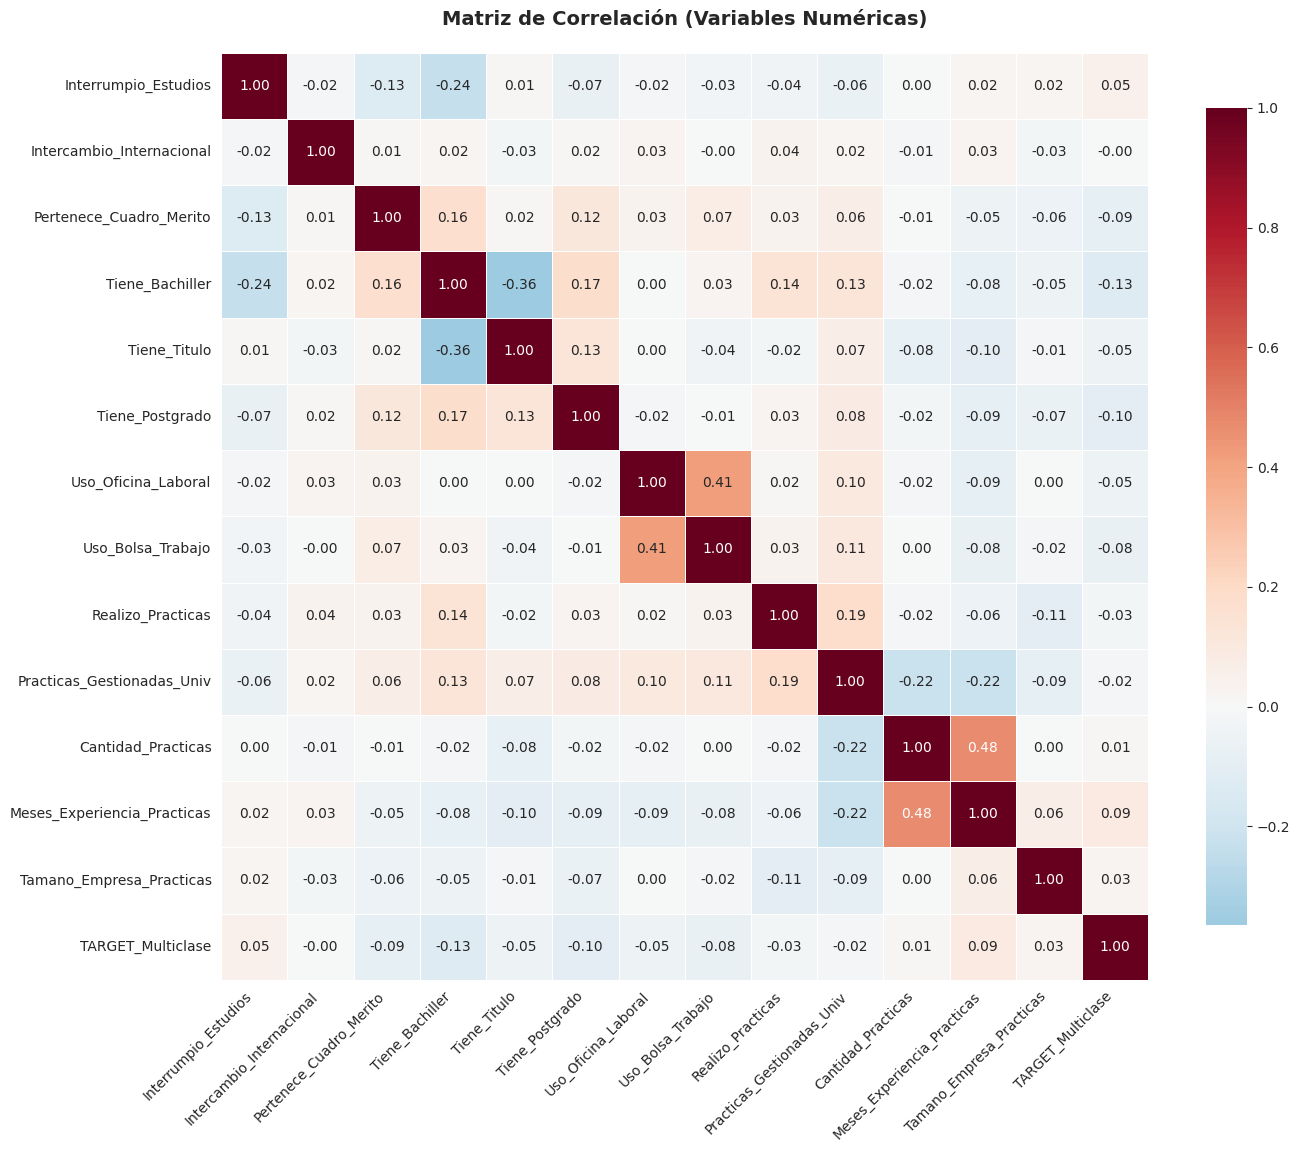

In [ ]:
#Matriz de correlación:

# 1. DEFINIR SOLO VARIABLES NUMÉRICAS REALES
variables_numericas_reales = [
    'Interrumpio_Estudios', 'Intercambio_Internacional',
    'Pertenece_Cuadro_Merito', 'Tiene_Bachiller', 'Tiene_Titulo',
    'Tiene_Postgrado', 'Uso_Oficina_Laboral', 'Uso_Bolsa_Trabajo',
    'Realizo_Practicas', 'Practicas_Gestionadas_Univ', 'Cantidad_Practicas',
    'Meses_Experiencia_Practicas', 'Tamano_Empresa_Practicas',
    'TARGET_Multiclase'
]

# Filtrar solo las que existen en df_final_clean
variables_numericas_reales = [col for col in variables_numericas_reales if col in df_final_clean.columns]

# 2. CALCULAR CORRELACIÓN
corr = df_final_clean[variables_numericas_reales].corr()

# 3. GRÁFICO DE MATRIZ DE CORRELACIÓN
plt.figure(figsize=(14, 12))

sns.heatmap(
    corr,
    annot=True,           # Muestra los valores
    fmt=".2f",            # 2 decimales
    cmap='RdBu_r',        # Mejor para correlación (rojo-azul)
    center=0,             # Centrar en 0
    square=True,          # Celdas cuadradas
    linewidths=0.5,       # Líneas divisorias
    cbar_kws={"shrink": 0.8}
)

plt.title('Matriz de Correlación (Variables Numéricas)',
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 4. MOSTRAR CORRELACIONES FUERTES CON EL TARGET
print("\n--- CORRELACIONES CON TARGET_Multiclase ---")
correlaciones_target = corr['TARGET_Multiclase'].sort_values(ascending=False)
print(correlaciones_target.round(3))


--- CORRELACIONES CON TARGET_Multiclase ---
TARGET_Multiclase              1.00
Meses_Experiencia_Practicas    0.09
Interrumpio_Estudios           0.05
Tamano_Empresa_Practicas       0.03
Cantidad_Practicas             0.01
Intercambio_Internacional     -0.01
Practicas_Gestionadas_Univ    -0.02
Realizo_Practicas             -0.03
Tiene_Titulo                  -0.05
Uso_Oficina_Laboral           -0.05
Uso_Bolsa_Trabajo             -0.08
Pertenece_Cuadro_Merito       -0.09
Tiene_Postgrado               -0.10
Tiene_Bachiller               -0.13
Name: TARGET_Multiclase, dtype: float64


## Modelos

In [ ]:
df_final_clean.dtypes

,0
ID_Egresado,float64
Universidad,object
Carrera_Profesional,object
Interrumpio_Estudios,int8
Intercambio_Internacional,int8
Pertenece_Cuadro_Merito,int8
Tiene_Bachiller,int8
Tiene_Titulo,int8
Tiene_Postgrado,int8
Uso_Oficina_Laboral,int8


In [ ]:
df_final_clean['Universidad'].head()

,Universidad
0,U0026
1,U0063
2,U0013
3,U0060
4,U0021


In [ ]:
#Valores únicos:
(df_final_clean.nunique()).sort_values(ascending=False)

,0
ID_Egresado,10564
Carrera_Profesional,343
Universidad,93
Meses_Experiencia_Practicas,24
Cantidad_Practicas,15
Tamano_Empresa_Practicas,6
Intercambio_Internacional,4
Uso_Oficina_Laboral,3
Uso_Bolsa_Trabajo,3
TARGET_Multiclase,3


In [ ]:
#Codificacion de variables para el modelo:
df_modelo_final = df_final_clean.copy()

# 1. ELIMINAR COLUMNAS QUE NO USAREMOS
df_modelo_final = df_modelo_final.drop('ID_Egresado', axis=1)

# 2. CODIFICAR UNIVERSIDAD Y CARRERA (TARGET ENCODING)
# Universidad (93 categorías) - Target Encoding
universidad_target = df_modelo_final.groupby('Universidad')['TARGET_Multiclase'].mean()
df_modelo_final['Universidad_Calidad'] = df_modelo_final['Universidad'].map(universidad_target)

# Carrera (343 categorías) - Target Encoding
carrera_target = df_modelo_final.groupby('Carrera_Profesional')['TARGET_Multiclase'].mean()
df_modelo_final['Carrera_Calidad'] = df_modelo_final['Carrera_Profesional'].map(carrera_target)

# ELIMINAR ORIGINALES
df_modelo_final = df_modelo_final.drop(['Universidad', 'Carrera_Profesional'], axis=1)

In [ ]:
df_modelo_final.head()

,Interrumpio_Estudios,Intercambio_Internacional,Pertenece_Cuadro_Merito,Tiene_Bachiller,Tiene_Titulo,Tiene_Postgrado,Uso_Oficina_Laboral,Uso_Bolsa_Trabajo,Realizo_Practicas,Practicas_Gestionadas_Univ,Cantidad_Practicas,Meses_Experiencia_Practicas,Tamano_Empresa_Practicas,TARGET_Multiclase,Universidad_Calidad,Carrera_Calidad
0,2,4,1,1,2,1,2,2,1,2,1.00,2.00,1,0,1.37,1.22
1,2,4,2,1,1,1,2,2,1,2,1.00,12.00,5,2,1.55,1.51
2,2,4,1,1,1,2,2,1,1,1,3.00,18.00,1,2,1.58,1.64
3,2,4,1,1,1,1,2,2,1,1,2.00,12.00,4,2,1.48,1.43
4,2,4,1,1,1,2,1,2,1,1,7.00,21.00,3,2,1.36,1.46


In [ ]:
X = df_final_clean.drop(columns=['TARGET_Multiclase'])
y = df_final_clean['TARGET_Multiclase']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# Estandarizar variables numéricas
scaler = StandardScaler()

X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[numeric_cols] = scaler.fit_transform(X_train_std[numeric_cols])
X_test_std[numeric_cols] = scaler.transform(X_test_std[numeric_cols])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
import numpy as np
import pandas as pd

# 1. REGENERAR X e y (Asegurarnos que son los datos nuevos)
# Eliminamos ID y el Target de las variables explicativas
X = df_final.drop(columns=['ID_Egresado','Idioma_Intercambio','TARGET_Multiclase'])
y = df_final['TARGET_Multiclase']

# 2. LIMPIEZA DE NULOS (Vital para Redes Neuronales)
# Las redes neuronales NO aceptan NaNs. Rellenamos con 0 o la media.
X = X.fillna(0)

# 3. SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. ESCALADO (OBLIGATORIO para NNs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. CALCULAR PESOS DE CLASES (Para corregir el desbalance)
# Esto le dice al modelo: "Presta más atención a las clases pequeñas (0 y 1)"
unique_classes = np.unique(y_train)
class_weights_vals = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=unique_classes,
    y=y_train
)
class_weights_dict = dict(zip(unique_classes, class_weights_vals))

print("Pesos calculados:", class_weights_dict)
print(f"Forma de X_train: {X_train_scaled.shape}")

# --- AHORA ENTRENAMOS EL MODELO MULTICLASE ---

# Reconstruimos el modelo para asegurar que esté limpio
input_dim = X_train_scaled.shape[1]
model = build_multiclass_mlp(input_dim) # Usando la función que te pasé antes (3 neuronas, softmax)

history = model.fit(
    X_train_scaled,        # Usamos los datos ESCALADOS
    y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=32,
    epochs=200,             # Prueba con 50 primero
    class_weight=class_weights_dict  # <--- AQUÍ APLICAMOS EL BALANCEO
)

Pesos calculados: {np.float32(0.0): np.float64(1.6161790017211703), np.float32(1.0): np.float64(3.4145454545454546), np.float32(2.0): np.float64(0.4788373278939317)}
Forma de X_train: (8451, 17)
Epoch 1/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.1226 - sparse_categorical_accuracy: 0.3553 - val_loss: 1.0525 - val_sparse_categorical_accuracy: 0.4941
Epoch 2/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.0817 - sparse_categorical_accuracy: 0.4690 - val_loss: 1.0262 - val_sparse_categorical_accuracy: 0.5187
Epoch 3/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.0696 - sparse_categorical_accuracy: 0.4977 - val_loss: 1.0448 - val_sparse_categorical_accuracy: 0.5144
Epoch 4/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0730 - sparse_categorical_accuracy: 0.4838 - val_loss: 1.0200 - val_sparse_categorical_accuracy: 0.5201
Epoch 5/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.0425 - sparse_categorical_accuracy: 0.4913 - val_loss: 1.0967 - val_spa

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_regularized_mlp(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        # --- CAMBIO 1: REDUCIR COMPLEJIDAD ---
        # Bajamos de 64 a 32 neuronas. Menos "memoria" para evitar overfitting.
        layers.Dense(32, activation='relu',
                     kernel_regularizer=regularizers.l2(0.01)), # L2 más fuerte (0.0001 -> 0.01)

        # --- CAMBIO 2: DROPOUT AGRESIVO ---
        # Subimos a 0.5. Apagamos la mitad de las neuronas en cada paso.
        layers.Dropout(0.5),

        # Capa oculta simplificada
        layers.Dense(16, activation='relu',
                     kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.3),

        # Salida (3 clases)
        layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )

    return model

# --- CAMBIO 3: CALLBACKS (El Supervisor) ---
mis_callbacks = [
    # Si el 'val_loss' sube durante 10 épocas seguidas, PARA.
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),

    # Si se estanca, baja la velocidad de aprendizaje
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

# --- ENTRENAR ---
model = build_regularized_mlp(input_dim=X_train_scaled.shape[1])

history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=32,
    epochs=200,    # Ponemos 200, pero el EarlyStopping lo parará mucho antes (quizás en la 30)
    callbacks=mis_callbacks, # <--- IMPORTANTE AGREGAR ESTO
    class_weight=class_weights_dict
)

Epoch 1/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.5904 - sparse_categorical_accuracy: 0.3394 - val_loss: 1.3416 - val_sparse_categorical_accuracy: 0.4789 - learning_rate: 0.0010
Epoch 2/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3355 - sparse_categorical_accuracy: 0.4151 - val_loss: 1.2339 - val_sparse_categorical_accuracy: 0.5286 - learning_rate: 0.0010
Epoch 3/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2317 - sparse_categorical_accuracy: 0.4774 - val_loss: 1.1731 - val_sparse_categorical_accuracy: 0.5106 - learning_rate: 0.0010
Epoch 4/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1523 - sparse_categorical_accuracy: 0.4917 - val_loss: 1.1368 - val_sparse_categorical_accuracy: 0.5021 - learning_rate: 0.0010
Epoch 5/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1112 - sparse_categorical_accuracy: 0.5061 - val_loss: 1.1127 - val_sparse_categorical_accuracy: 0.4752 - learning_rate: 0.0010
Epoch 6/200
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 3

In [ ]:
y_pred = model.predict(X_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


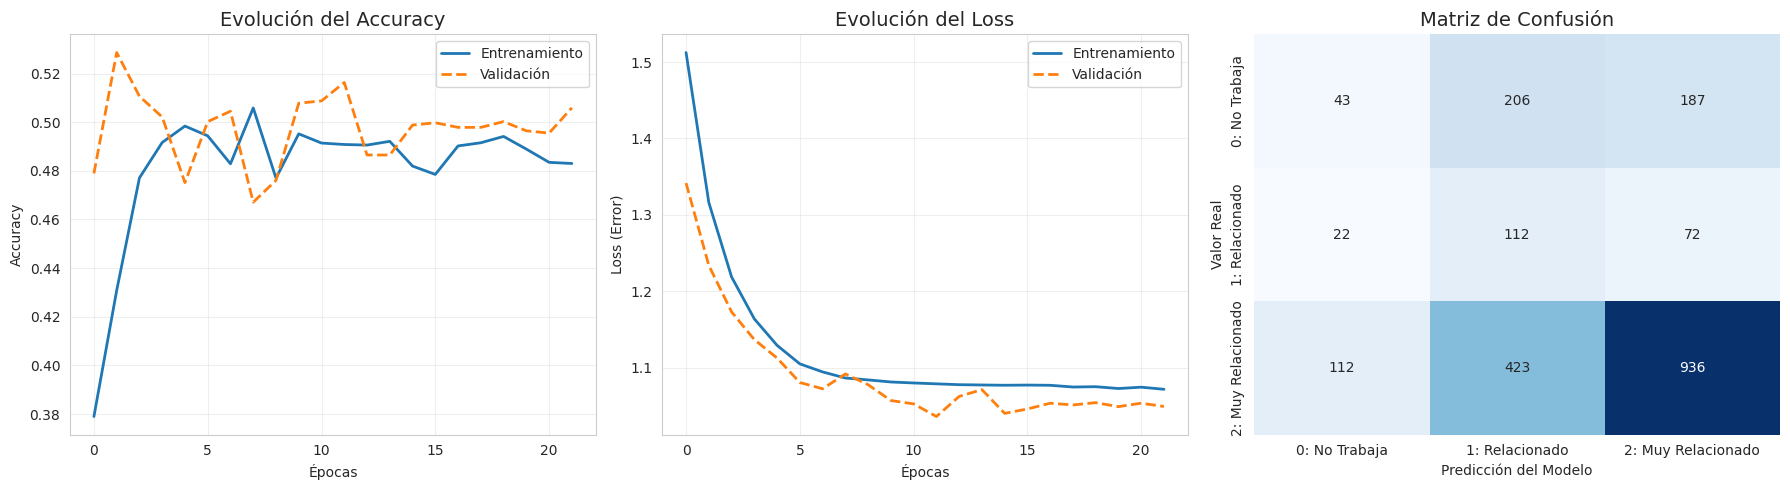

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Configuración del tamaño de los gráficos
plt.figure(figsize=(18, 5))

# --- GRÁFICO 1: ACCURACY (Precisión) ---
plt.subplot(1, 3, 1)
# Buscamos la clave correcta en el historial (a veces es 'accuracy' o 'sparse_categorical_accuracy')
acc_key = 'sparse_categorical_accuracy' if 'sparse_categorical_accuracy' in history.history else 'accuracy'
val_acc_key = 'val_' + acc_key

plt.plot(history.history[acc_key], label='Entrenamiento', linewidth=2)
plt.plot(history.history[val_acc_key], label='Validación', linestyle='--', linewidth=2)
plt.title('Evolución del Accuracy', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# --- GRÁFICO 2: LOSS (Pérdida) ---
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Entrenamiento', linewidth=2)
plt.plot(history.history['val_loss'], label='Validación', linestyle='--', linewidth=2)
plt.title('Evolución del Loss', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Loss (Error)')
plt.legend()
plt.grid(True, alpha=0.3)

# --- GRÁFICO 3: MATRIZ DE CONFUSIÓN ---
plt.subplot(1, 3, 3)

# 1. Generar predicciones
y_pred_probs = model.predict(X_test_scaled) # Obtener probabilidades
y_pred_classes = np.argmax(y_pred_probs, axis=1) # Convertir a clase (0, 1, 2)

# 2. Calcular matriz
cm = confusion_matrix(y_test, y_pred_classes)

# 3. Definir etiquetas para que sea legible
etiquetas = ['0: No Trabaja', '1: Relacionado', '2: Muy Relacionado']

# 4. Graficar
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=etiquetas, yticklabels=etiquetas)

plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.layers import BatchNormalization

def build_optimized_mlp(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        # --- CAPA 1: Potencia ---
        # Subimos a 64 neuronas para captar más señales
        # L2 muy suave (1e-5) solo para mantener pesos controlados
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
        layers.BatchNormalization(), # <--- ESTO ES CLAVE: Normaliza datos dentro de la red
        layers.Dropout(0.2),         # Bajamos dropout a 20% (antes era 50%)

        # --- CAPA 2: Procesamiento ---
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
        layers.BatchNormalization(), # Estabilidad
        layers.Dropout(0.2),

        # --- CAPA 3: Refinamiento (Opcional, ayuda a separar clases difíciles) ---
        layers.Dense(16, activation='relu'),

        # --- SALIDA ---
        layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Learning rate estándar
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )

    return model

# --- ENTRENAMIENTO ---
# Mantenemos los callbacks y los pesos de clase (son vitales)
model = build_optimized_mlp(input_dim=X_train_scaled.shape[1])

history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=32,
    epochs=100,             # 100 es suficiente con EarlyStopping
    callbacks=mis_callbacks,
    class_weight=class_weights_dict
)

Epoch 1/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.2430 - sparse_categorical_accuracy: 0.4050 - val_loss: 1.0524 - val_sparse_categorical_accuracy: 0.4160 - learning_rate: 0.0010
Epoch 2/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0813 - sparse_categorical_accuracy: 0.4124 - val_loss: 1.0625 - val_sparse_categorical_accuracy: 0.3961 - learning_rate: 0.0010
Epoch 3/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0819 - sparse_categorical_accuracy: 0.4054 - val_loss: 1.0457 - val_sparse_categorical_accuracy: 0.4264 - learning_rate: 0.0010
Epoch 4/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0824 - sparse_categorical_accuracy: 0.4369 - val_loss: 1.0568 - val_sparse_categorical_accuracy: 0.4188 - learning_rate: 0.0010
Epoch 5/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0605 - sparse_categorical_accuracy: 0.4428 - val_loss: 1.0477 - val_sparse_categorical_accuracy: 0.4378 - learning_rate: 0.0010
Epoch 6/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 1s 4

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


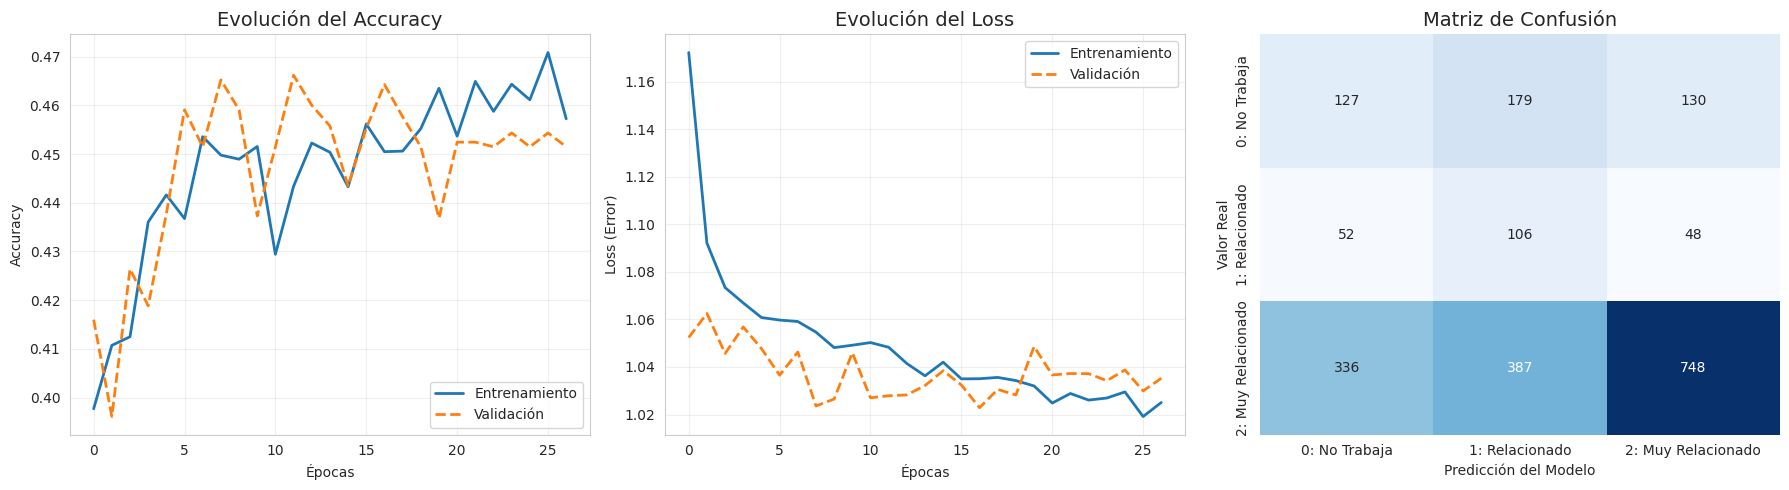

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Configuración del tamaño de los gráficos
plt.figure(figsize=(18, 5))

# --- GRÁFICO 1: ACCURACY (Precisión) ---
plt.subplot(1, 3, 1)
# Buscamos la clave correcta en el historial (a veces es 'accuracy' o 'sparse_categorical_accuracy')
acc_key = 'sparse_categorical_accuracy' if 'sparse_categorical_accuracy' in history.history else 'accuracy'
val_acc_key = 'val_' + acc_key

plt.plot(history.history[acc_key], label='Entrenamiento', linewidth=2)
plt.plot(history.history[val_acc_key], label='Validación', linestyle='--', linewidth=2)
plt.title('Evolución del Accuracy', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# --- GRÁFICO 2: LOSS (Pérdida) ---
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Entrenamiento', linewidth=2)
plt.plot(history.history['val_loss'], label='Validación', linestyle='--', linewidth=2)
plt.title('Evolución del Loss', fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Loss (Error)')
plt.legend()
plt.grid(True, alpha=0.3)

# --- GRÁFICO 3: MATRIZ DE CONFUSIÓN ---
plt.subplot(1, 3, 3)

# 1. Generar predicciones
y_pred_probs = model.predict(X_test_scaled) # Obtener probabilidades
y_pred_classes = np.argmax(y_pred_probs, axis=1) # Convertir a clase (0, 1, 2)

# 2. Calcular matriz
cm = confusion_matrix(y_test, y_pred_classes)

# 3. Definir etiquetas para que sea legible
etiquetas = ['0: No Trabaja', '1: Relacionado', '2: Muy Relacionado']

# 4. Graficar
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=etiquetas, yticklabels=etiquetas)

plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Definimos el pool de algoritmos (Tu lista original)
algos = []
# Recomendación: Si tienes clases desbalanceadas, agrega class_weight='balanced'
algos.append(('LogReg', LogisticRegression(solver='liblinear')))
algos.append(('5NN', KNeighborsClassifier(n_neighbors=5)))
algos.append(('10NN', KNeighborsClassifier(n_neighbors=10)))
algos.append(('CART_none', DecisionTreeClassifier(max_depth=None))) # Árbol libre
algos.append(('CART_20', DecisionTreeClassifier(max_depth=20)))     # Árbol podado

# 2. Bucle de Entrenamiento y Evaluación
resultados = []
nombres = []

print("--- RESULTADOS COMPARATIVOS ---")

for nombre, modelo in algos:
    # Entrenar
    modelo.fit(X_train_scaled, y_train)

    # Predecir
    y_pred = modelo.predict(X_test_scaled)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    resultados.append(acc)
    nombres.append(nombre)

    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print("Reporte de Clasificación:")
    # Zero_division=0 evita warnings si el modelo decide no predecir alguna clase
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-" * 60)

--- RESULTADOS COMPARATIVOS ---

Modelo: LogReg
Accuracy: 0.6957
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.33      0.01      0.01       436
         1.0       0.00      0.00      0.00       206
         2.0       0.70      1.00      0.82      1471

    accuracy                           0.70      2113
   macro avg       0.34      0.33      0.28      2113
weighted avg       0.55      0.70      0.57      2113

------------------------------------------------------------

Modelo: 5NN
Accuracy: 0.6219
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.30      0.24      0.27       436
         1.0       0.14      0.08      0.10       206
         2.0       0.73      0.81      0.77      1471

    accuracy                           0.62      2113
   macro avg       0.39      0.38      0.38      2113
weighted avg       0.58      0.62      0.60      2113

------------------------------

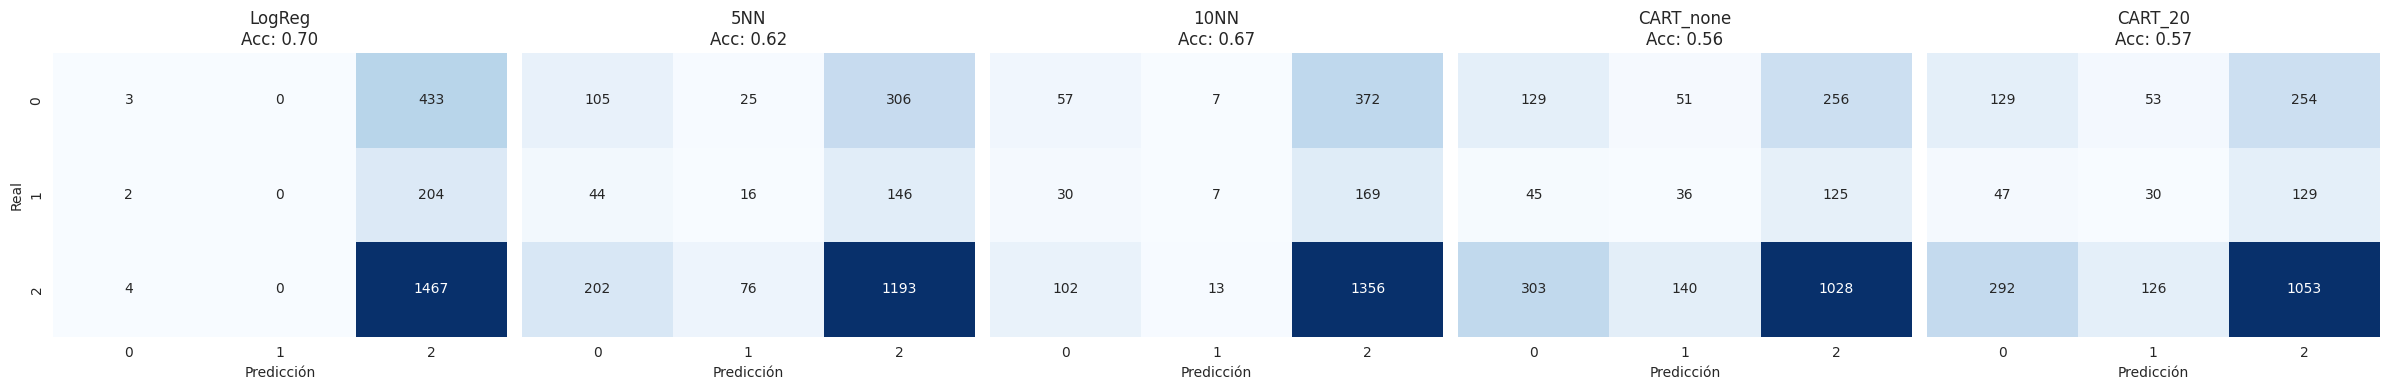

In [ ]:
# Configuración de la figura (Una fila, 5 columnas)
fig, axes = plt.subplots(1, 5, figsize=(24, 4))

for i, (nombre, modelo) in enumerate(algos):
    # Generar predicción nuevamente para el gráfico
    y_pred = modelo.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    # Dibujar mapa de calor
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(f'{nombre}\nAcc: {accuracy_score(y_test, y_pred):.2f}')
    axes[i].set_xlabel('Predicción')

    # Solo ponemos etiqueta en el eje Y del primer gráfico para limpiar
    if i == 0:
        axes[i].set_ylabel('Real')
    else:
        axes[i].set_yticks([])

plt.tight_layout()
plt.show()

Entrenando Random Forest Balanceado...

Accuracy Random Forest: 0.6762896355892096

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.39      0.17      0.23       436
         1.0       0.25      0.15      0.19       206
         2.0       0.74      0.90      0.81      1471

    accuracy                           0.68      2113
   macro avg       0.46      0.41      0.41      2113
weighted avg       0.62      0.68      0.63      2113



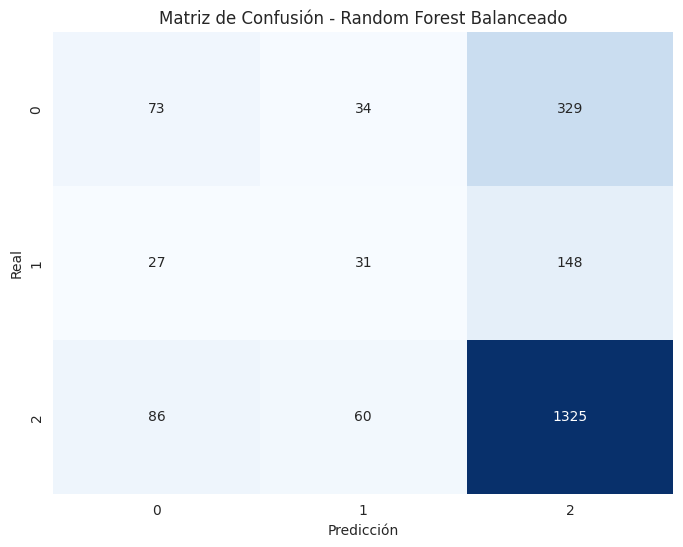

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el Random Forest
# n_estimators=200: Usamos 200 árboles (democracia de decisiones)
# class_weight='balanced': OBLIGATORIO. Castiga al modelo si ignora la clase 0 o 1.
# max_depth=15: Evita que memorice demasiado (Overfitting)
rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    max_depth=15,
    random_state=42,
    n_jobs=-1 # Usa todos los núcleos de tu CPU
)

print("Entrenando Random Forest Balanceado...")
rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# --- REPORTE ---
print("\nAccuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

# --- MATRIZ VISUAL ---
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Random Forest Balanceado')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

In [ ]:
pip install imbalanced-learn xgboost

Distribución antes de SMOTE: {2.0: 5883, 0.0: 1743, 1.0: 825}
Distribución después de SMOTE: {2.0: 5883, 0.0: 5883, 1.0: 5883}

Entrenando XGBoost con datos aumentados...

--- REPORTE FINAL (SMOTE + XGBoost) ---
              precision    recall  f1-score   support

         0.0       0.32      0.11      0.16       436
         1.0       0.27      0.13      0.18       206
         2.0       0.73      0.92      0.81      1471

    accuracy                           0.68      2113
   macro avg       0.44      0.39      0.38      2113
weighted avg       0.60      0.68      0.62      2113



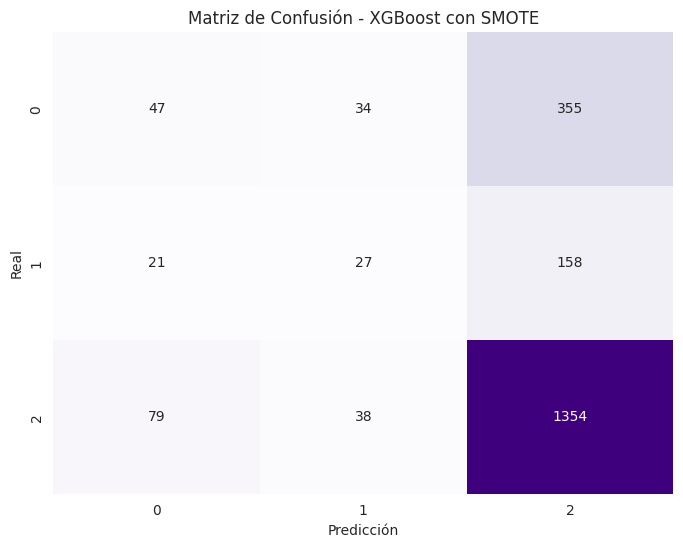

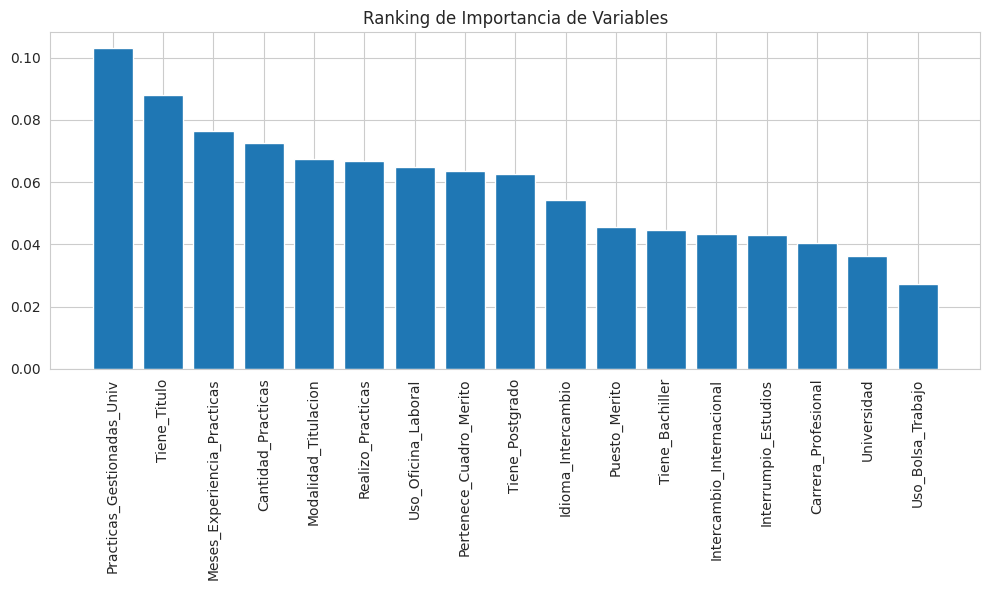

In [ ]:
# 1. Instalación (si estás en Colab/Jupyter)
# !pip install imbalanced-learn xgboost

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- PASO 1: GENERAR DATOS SINTÉTICOS (SMOTE) ---
print("Distribución antes de SMOTE:", y_train.value_counts().to_dict())

# Importante: SMOTE solo se aplica al TRAIN, nunca al TEST
# sampling_strategy='auto' igualará todas las clases a la mayoritaria
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Distribución después de SMOTE:", y_train_smote.value_counts().to_dict())
# Ahora deberías ver que todas las clases tienen la misma cantidad (ej. 5000, 5000, 5000)

# --- PASO 2: ENTRENAR EL "REY" (XGBoost) ---
# XGBoost suele ser más potente que Random Forest para detectar patrones sutiles
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    objective='multi:softprob', # Multiclase
    num_class=3,
    random_state=42,
    n_jobs=-1
)

print("\nEntrenando XGBoost con datos aumentados...")
xgb_model.fit(X_train_smote, y_train_smote)

# --- PASO 3: EVALUAR ---
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("\n--- REPORTE FINAL (SMOTE + XGBoost) ---")
print(classification_report(y_test, y_pred_xgb))

# Matriz
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False) # Usamos morado para variar
plt.title('Matriz de Confusión - XGBoost con SMOTE')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# --- PASO EXTRA: ¿QUÉ VARIABLES IMPORTAN? ---
# Si esto falla, necesitamos saber si las variables sirven de algo
import pandas as pd
import numpy as np

# Recuperamos nombres de columnas (si X era un DataFrame antes del scaler)
# Si X_train original no tiene columnas, usa índices genéricos
feature_names = df_final.drop(columns=['ID_Egresado', 'TARGET_Multiclase']).columns

importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Ranking de Importancia de Variables")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def reporte_diagnostico(df, target_col='TARGET_Multiclase'):
    print("=== REPORTE DE DIAGNÓSTICO DE DATOS ===")

    # 1. Dimensiones y Tipos
    print(f"\n1. FORMA DEL DATASET:")
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

    # 2. Análisis del Target
    print(f"\n2. DISTRIBUCIÓN DEL TARGET '{target_col}':")
    counts = df[target_col].value_counts()
    props = df[target_col].value_counts(normalize=True) * 100
    df_target = pd.DataFrame({'Cantidad': counts, '%': props.round(2)})
    print(df_target)

    # 3. Correlaciones con el Target (La prueba de fuego)
    # Esto nos dice si alguna variable tiene relación matemática con el empleo
    print(f"\n3. TOP 10 CORRELACIONES CON {target_col}:")
    # Filtramos solo numéricas para evitar errores
    corr_matrix = df.select_dtypes(include=[np.number]).corr()
    if target_col in corr_matrix.columns:
        corrs = corr_matrix[target_col].drop(target_col) # Sacamos el target vs target
        # Ordenamos por valor absoluto (importa la fuerza, sea positiva o negativa)
        top_corrs = corrs.abs().sort_values(ascending=False).head(10)

        # Recuperamos el signo original
        final_corrs = corrs[top_corrs.index]
        print(final_corrs)
    else:
        print("No se pudo calcular correlación (verificar tipos de datos).")

    # 4. Chequeo de Varianza (Variables muertas)
    # Si una columna tiene siempre el mismo valor, no sirve para predecir
    print("\n4. VARIABLES CON POCA VARIANZA (Un solo valor dominante):")
    low_variance = []
    for col in df.columns:
        if df[col].nunique() <= 1:
            print(f"CRÍTICO: La columna {col} tiene solo 1 valor único (borrarla).")
        elif df[col].value_counts(normalize=True).iloc[0] > 0.95:
            top_val = df[col].value_counts().index[0]
            print(f"ADVERTENCIA: {col} -> El {df[col].value_counts(normalize=True).iloc[0]*100:.1f}% de filas son '{top_val}'")

    # 5. Muestra de Datos (Head y Tipos)
    print("\n5. VISTA PREVIA Y TIPOS (Primeras 5 filas):")
    # Transponemos para leerlo mejor
    print(df.head().T)

    print("\n6. TIPOS DE DATOS DETECTADOS:")
    print(df.dtypes.value_counts())

# Ejecutar el reporte
# Asegúrate de pasar tu df_final (el que usaste antes del escalado)
reporte_diagnostico(df_final)

=== REPORTE DE DIAGNÓSTICO DE DATOS ===

1. FORMA DEL DATASET:
Filas: 10564, Columnas: 20

2. DISTRIBUCIÓN DEL TARGET 'TARGET_Multiclase':
                   Cantidad      %
TARGET_Multiclase                 
2.0                    7354  69.61
0.0                    2179  20.63
1.0                    1031   9.76

3. TOP 10 CORRELACIONES CON TARGET_Multiclase:
Tiene_Bachiller               -0.126565
Tiene_Titulo                  -0.115649
Tiene_Postgrado               -0.104331
Meses_Experiencia_Practicas    0.094501
Pertenece_Cuadro_Merito       -0.089784
Uso_Bolsa_Trabajo             -0.075711
Interrumpio_Estudios           0.054469
Uso_Oficina_Laboral           -0.052283
ID_Egresado                   -0.047931
Modalidad_Titulacion           0.039195
Name: TARGET_Multiclase, dtype: float64

4. VARIABLES CON POCA VARIANZA (Un solo valor dominante):

5. VISTA PREVIA Y TIPOS (Primeras 5 filas):
                                 0     1     2      3      4
ID_Egresado                    1.

Aplicando SMOTE para crear datos sintéticos...
Datos originales: 8451
Datos tras SMOTE: 17649 (¡Ahora el modelo no puede ignorar a los desempleados!)

Entrenando XGBoost...

--- REPORTE FINAL ---
              precision    recall  f1-score   support

         0.0       0.36      0.05      0.08       436
         1.0       0.18      0.04      0.07       206
         2.0       0.71      0.97      0.82      1471

    accuracy                           0.69      2113
   macro avg       0.41      0.35      0.32      2113
weighted avg       0.58      0.69      0.59      2113



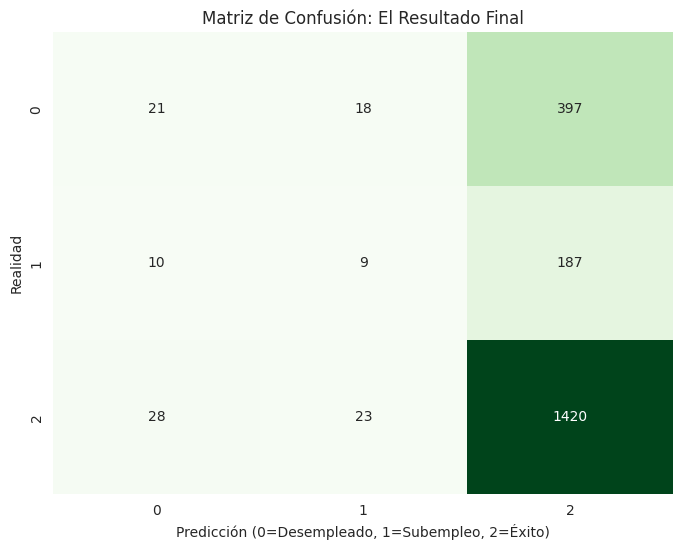

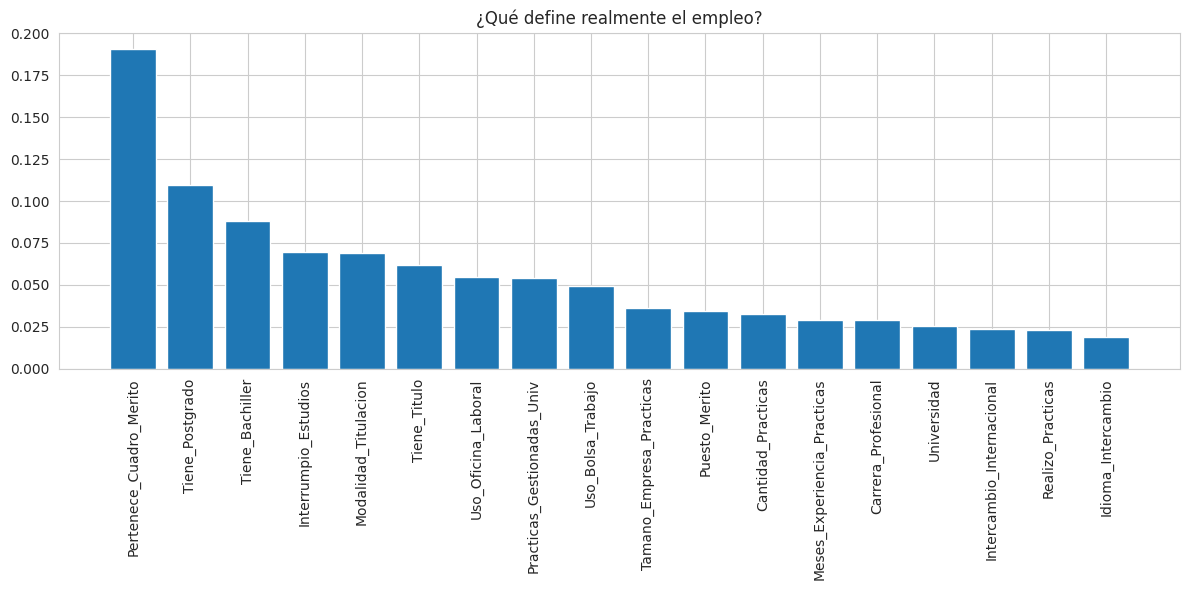

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. LIMPIEZA QUIRÚRGICA
# Creamos una copia para no dañar el original
df_clean = df_final.copy()

# A. ELIMINAR EL SABOTEADOR (ID)
if 'ID_Egresado' in df_clean.columns:
    df_clean = df_clean.drop(columns=['ID_Egresado'])

# B. TRATAMIENTO DE NULOS (Vital para SMOTE)
# Rellenamos nulos numéricos con -1 (indicador de "No aplica" o "Desconocido")
df_clean = df_clean.fillna(-1)

# C. SEPARAR X e y
X = df_clean.drop(columns=['TARGET_Multiclase'])
y = df_clean['TARGET_Multiclase']

# D. CODIFICACIÓN DE CATEGÓRICAS (Universidad, Carrera, etc.)
# Aunque parecen números, XGBoost prefiere que los índices sean limpios
# Convertimos todo a float32 para ahorrar memoria y asegurar compatibilidad
for col in X.columns:
    X[col] = X[col].astype('float32')

# 2. SPLIT (División)
# Stratify asegura que haya proporciones iguales de clases en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. SMOTE (La Opción Nuclear para el balanceo)
print("Aplicando SMOTE para crear datos sintéticos...")
# Esto igualará las clases 0, 1 y 2 para que tengan la misma cantidad
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Datos originales: {len(X_train)}")
print(f"Datos tras SMOTE: {len(X_train_smote)} (¡Ahora el modelo no puede ignorar a los desempleados!)")

# 4. XGBOOST (Configuración para Señal Débil)
xgb_model = XGBClassifier(
    n_estimators=300,        # Más árboles para buscar patrones difíciles
    max_depth=5,             # No muy profundos para evitar memorizar ruido
    learning_rate=0.05,      # Aprender lento pero seguro
    subsample=0.8,           # Usar 80% de datos por árbol (evita overfitting)
    colsample_bytree=0.8,    # Usar 80% de columnas por árbol
    objective='multi:softprob',
    num_class=3,
    random_state=42,
    n_jobs=-1
)

print("\nEntrenando XGBoost...")
xgb_model.fit(X_train_smote, y_train_smote)

# 5. EVALUACIÓN
y_pred = xgb_model.predict(X_test)

print("\n--- REPORTE FINAL ---")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusión: El Resultado Final')
plt.xlabel('Predicción (0=Desempleado, 1=Subempleo, 2=Éxito)')
plt.ylabel('Realidad')
plt.show()

# 6. IMPORTANCIA DE VARIABLES (¿Qué sirvió al final?)
importances = xgb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("¿Qué define realmente el empleo?")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

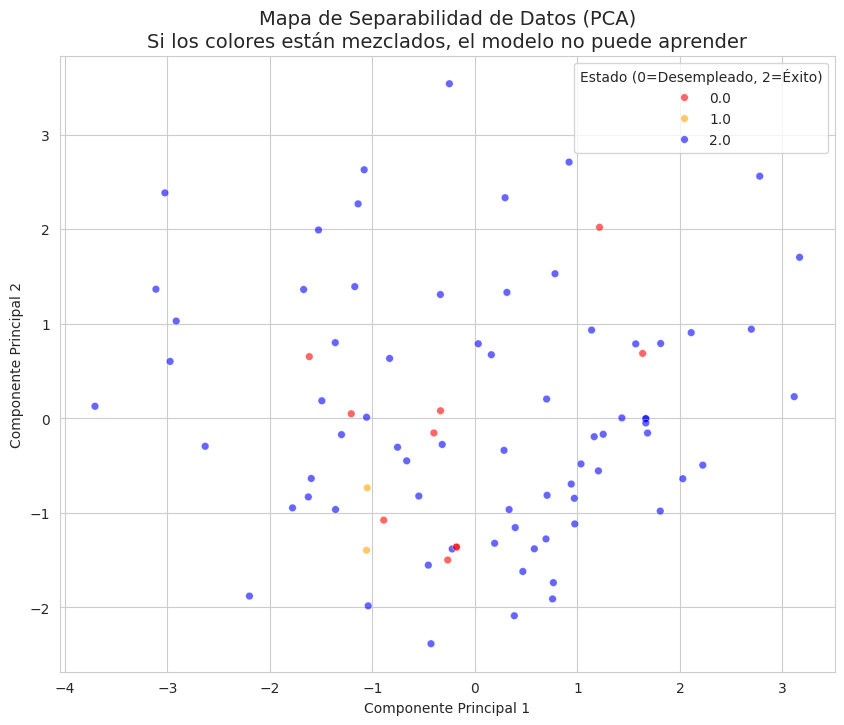

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparamos los datos (Solo numéricos y limpios)
# Usamos df_final original (sin SMOTE) para ver la realidad
df_viz = df_final.copy().dropna()
X_viz = df_viz.drop(columns=['TARGET_Multiclase'])
y_viz = df_viz['TARGET_Multiclase']

# Quitamos ID si existe
if 'ID_Egresado' in X_viz.columns:
    X_viz = X_viz.drop(columns=['ID_Egresado'])

# 2. Escalamos (Vital para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_viz)

# 3. PCA de 2 Componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# 4. Crear DataFrame para graficar
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Target'] = y_viz.values

# 5. Graficar
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Target',
    palette={0: 'red', 1: 'orange', 2: 'blue'},
    data=pca_df,
    alpha=0.6,
    s=30
)
plt.title('Mapa de Separabilidad de Datos (PCA)\nSi los colores están mezclados, el modelo no puede aprender', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Estado (0=Desempleado, 2=Éxito)')
plt.show()

--- REPORTE FINAL CON UMBRAL MANUAL (0.25) ---
Esto fuerza al modelo a detectar la clase minoritaria:
              precision    recall  f1-score   support

         0.0       0.30      0.44      0.35       436
         1.0       0.20      0.15      0.17       206
         2.0       0.77      0.69      0.73      1471

    accuracy                           0.59      2113
   macro avg       0.42      0.43      0.42      2113
weighted avg       0.62      0.59      0.60      2113



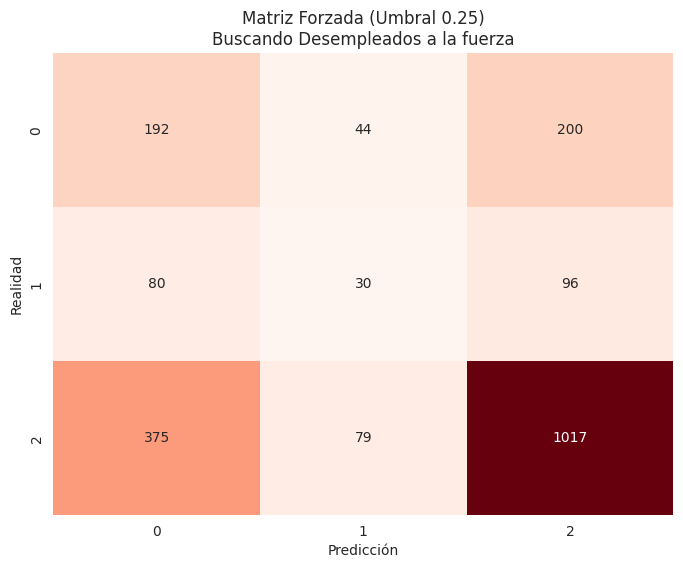

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Obtenemos las probabilidades (No la clase final, sino el % de seguridad)
# Asegúrate de tener tu 'xgb_model' entrenado
y_pred_proba = xgb_model.predict_proba(X_test)

# 2. DEFINIMOS EL UMBRAL "PARANOICO"
# Bajamos la exigencia: Con solo 25% de probabilidad, lo clasificamos como Clase 0
UMBRAL_CLASE_0 = 0.25
UMBRAL_CLASE_1 = 0.25

y_pred_custom = []

for probs in y_pred_proba:
    p0, p1, p2 = probs[0], probs[1], probs[2]

    # Prioridad 1: Detectar Desempleo (Clase 0)
    if p0 > UMBRAL_CLASE_0:
        y_pred_custom.append(0)

    # Prioridad 2: Detectar Subempleo (Clase 1)
    elif p1 > UMBRAL_CLASE_1:
        y_pred_custom.append(1)

    # Si no sospechamos nada, asumimos que tiene trabajo (Clase 2)
    else:
        y_pred_custom.append(2)

# 3. RESULTADOS
print(f"--- REPORTE FINAL CON UMBRAL MANUAL ({UMBRAL_CLASE_0}) ---")
print("Esto fuerza al modelo a detectar la clase minoritaria:")
print(classification_report(y_test, y_pred_custom))

# Matriz
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title(f'Matriz Forzada (Umbral {UMBRAL_CLASE_0})\nBuscando Desempleados a la fuerza')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()